# Read, clean, and validate

## DataFrames and Series

### Exploring the NSFG data

In [6]:
import pandas as pd

In [30]:
nsfg = pd.read_hdf("nsfg.hdf5")
print(nsfg.shape)
print(nsfg.columns)
ounces = nsfg["birthwgt_oz1"]
print(ounces.head())

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


## Clean and Validate

### Validate a variable

In [19]:
# In the NSFG dataset, the variable 'outcome' encodes the outcome
# of each pregnancy. The number of live births: 6489
nsfg["outcome"].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

### Clean a variable

In [31]:
import numpy as np
print(nsfg.nbrnaliv.value_counts())
nsfg["nbrnaliv"].replace(8, np.nan, inplace=True)
print(nsfg.nbrnaliv.value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Compute a variable

In [70]:
agecon = nsfg["agecon"] / 100
agepreg = nsfg["agepreg"] / 100
preg_length = agepreg - agecon
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Filter and visualize 

### Make a histogram

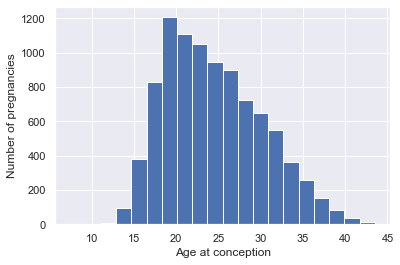

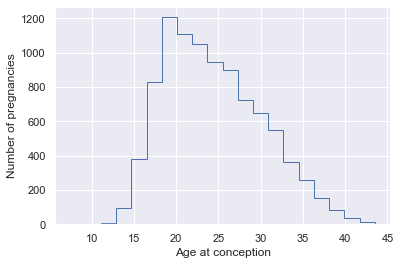

In [91]:
import matplotlib.pyplot as plt
plt.hist(agecon, bins=20)
plt.xlabel("Age at conception")
plt.ylabel("Number of pregnancies")
plt.show()
plt.hist(agecon, bins=20, histtype="step")
plt.xlabel("Age at conception")
plt.ylabel("Number of pregnancies")
plt.show()

### Compute birth weight

In [129]:
# to select full term (>=37)
pounds = nsfg["birthwgt_lb1"].replace([98, 99], np.nan)
ounces = nsfg["birthwgt_oz1"].replace([98, 99], np.nan)
birth_weight = pounds + ounces /16

full_term = nsfg["prglngth"] >= 37
full_term_weight = birth_weight[full_term]
print(full_term_weight.mean())

7.372323879231473


### Filter

In [132]:
full_term = nsfg["prglngth"] >= 37
single = nsfg["nbrnaliv"] == 1
single_full_term_weight = birth_weight[full_term & single]
print("Single full-term mean:",single_full_term_weight.mean())

mult_full_term_weight = birth_weight[full_term & ~single]
print("Multiple full-term mean:",mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
